## Mounting google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf /content/sample_data

Mounted at /content/drive


## Cloning repository

In [2]:
!git clone https://github.com/arrafi-musabbir/coronary-artery-stenosis-detection.git

Cloning into 'coronary-artery-stenosis-detection'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 31 (delta 13), reused 15 (delta 5), pack-reused 0
Unpacking objects: 100% (31/31), 251.75 KiB | 359.00 KiB/s, done.


## Installing necessary libraries

In [3]:
import os
%cd /content

!pip uninstall opencv-python opencv-contrib-python imgaug -y
!pip install imgaug==0.2.5 opencv-python-headless==4.1.2.30 lvis 

!pip install tf-models-official==2.8 tensorflow-gpu==2.8 keras==2.8 tensorboard==2.8 tensorflow-estimator==2.8
!pip install tensorflow.io

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools

import tensorflow as tf
print("Installed Tensorflow version >>> ", tf.__version__)

/content
Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
Found existing installation: opencv-contrib-python 4.7.0.72
Uninstalling opencv-contrib-python-4.7.0.72:
  Successfully uninstalled opencv-contrib-python-4.7.0.72
Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Successfully uninstalled imgaug-0.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.7/562.7 kB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.

## Downloading the TensorFlow Model Garden

In [4]:
!git clone --quiet https://github.com/tensorflow/models.git

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python /content/models/research/object_detection/builders/model_builder_test.py

/content/models/research
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8funct

## Protobuf Installation/Compilation

In [5]:
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


## COCO API installation

In [6]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cp -r pycocotools /content/models/research

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 5.80 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/models/research/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.10
creating build/temp.linux-x86_64-3.10/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror

## Test object detection API

In [7]:
%cd /content/models/research
%cp object_detection/packages/tf2/setup.py .
!python -m pip install .
!python object_detection/builders/model_builder_tf2_test.py

/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Downloading dataset

In [8]:
from tqdm import tqdm
import zipfile
import time

%cd /content/
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    # !wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/ydrm75xywg-1.zip
    !wget https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/ydrm75xywg-1.zip
    with zipfile.ZipFile('/content/ydrm75xywg-1.zip') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting preliminary'):
            try:
                zf.extract(member, "/content/dataset")
            except zipfile.error as e:
                pass
    !rm /content/ydrm75xywg-1.zip
    with zipfile.ZipFile('/content/dataset/ydrm75xywg-1/Stenosis detection.zip') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting final dataset'):
            try:
                zf.extract(member, "/content/stenosis_dataset")
            except zipfile.error as e:
                pass
    print("Cleaning up after downlaod and extraction")
    !rm -rf /content/dataset
    !rm -rf /content/stenosis_dataset/video_test
    !rm -rf /content/stenosis_dataset/video_val
    print("Download & extraction completed")
else:
    print("Moving on ...")

et = time.time()
elapsed_time = et - st
print('\nExecution time:', elapsed_time/60, ' minutes')

/content
Are you sure? Y/N :Y
--2023-05-08 19:01:41--  https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/ydrm75xywg-1.zip
Resolving prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)... 3.5.70.104, 52.218.84.91, 52.218.92.80, ...
Connecting to prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com)|3.5.70.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8508041959 (7.9G) [application/zip]
Saving to: ‘ydrm75xywg-1.zip’

ydrm75xywg-1.zip    100%[===================>]   7.92G  13.6MB/s    in 10m 6s  

2023-05-08 19:11:48 (13.4 MB/s) - ‘ydrm75xywg-1.zip’ saved [8508041959/8508041959]



Extracting final dataset: 100%|██████████| 16926/16926 [03:22<00:00, 83.52it/s]


Cleaning up after downlaod and extraction
Download & extraction completed

Execution time: 14.642468512058258  minutes


## Creating folder structure

In [9]:
import os 
workspace_path = '/content/drive/MyDrive/workspace/'
workspace_model_path = workspace_path + 'stenosis_detection_FRCNN/'
annotation_path = workspace_model_path + 'annotations/'
exported_model_path = workspace_model_path + 'exported-models/'
images_path = workspace_model_path + 'images/'
trained_model_path = workspace_model_path + 'trained_model/'
pretrained_model_path = workspace_model_path + 'pre-trained-models/'

try:
    os.mkdir(workspace_path)
    print("Created workspace")
except FileExistsError :
    print("workspace directory already exists: creating rest of the structure inside workspace")
try:
    os.mkdir(workspace_model_path)
    os.mkdir(annotation_path)
    os.mkdir(exported_model_path)
    os.mkdir(images_path)
    os.mkdir(trained_model_path)
    os.mkdir(pretrained_model_path)
    print("full directory structure creation done")
except FileExistsError :
    print("directory structure already exists: Will be using existing directories")

Created workspace
full directory structure creation done


## Creating labelmap.pbtxt

In [10]:
labels = [{'name':'Stenosis', 'id':1}]
with open(annotation_path + "label_map.pbtxt", 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## Partitioning the dataset

In [11]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    if os.path.isdir("/content/stenosis_dataset/dataset"):
        !rm -rf /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/
        os.mkdir(images_path)

        !python /content/coronary-artery-stenosis-detection/partition_dataset.py -x -i /content/stenosis_dataset/dataset -o /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images -r 0.1

        print("Dataset split into Train & Test")
        print("Cleaning up after partitioning dataset")
        !rm -rf /content/stenosis_dataset
    else:
      print("Dataset doesn't exists")
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nExecution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
/content/coronary-artery-stenosis-detection/partition_dataset.py:35: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated) but at position 27
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png|.bmp)$', f)]
Dataset split into Train & Test
Cleaning up after partitioning dataset

Execution time: 4.801163689295451 minutes


## Generating TF records

### train record

In [12]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    !python /content/coronary-artery-stenosis-detection/generate_tfrecord.py -x /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/train -l /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt -o /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/train.record
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nGenerated train.record successfully')
print('Execution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
Successfully created the TFRecord file: /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/train.record

Generated train.record successfully
Execution time: 4.4755967656771345 minutes


### test record

In [13]:
st = time.time()
q = input("Are you sure? Y/N :")
if q == 'Y':
    !python /content/coronary-artery-stenosis-detection/generate_tfrecord.py -x /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/test -l /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt -o /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/test.record
else:
    print('Moving on ...')
et = time.time()
elapsed_time = et - st
print('\nGenerated train.record successfully')
print('Execution time:', elapsed_time/60 , 'minutes')

Are you sure? Y/N :Y
Successfully created the TFRecord file: /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/test.record

Generated train.record successfully
Execution time: 1.5040977835655212 minutes


## Download & extract pretrained model

In [14]:
%cd /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
!tar -xzvf /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
!rm /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
print("\nDownload & extraction completed")

/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models
--2023-05-08 19:26:53--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.194.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447961769 (427M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 427.21M  46.1MB/s    in 11s     

2023-05-08 19:27:05 (38.4 MB/s) - ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’ saved [447961769/447961769]

faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ck

## Configure training pipeline

In [15]:
%cd /content/
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

/content


In [16]:
my_model_path = trained_model_path + "my_FRCNN/"
CONFIG_PATH = my_model_path + "pipeline.config"

In [17]:
try:
    os.mkdir(my_model_path)
except FileExistsError :
    print("my FRCNN already exists")
!cp {"/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/pre-trained-models/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/pipeline.config"} {my_model_path}
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [18]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
CONFIG_PATH

'/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config'

In [19]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [20]:
pipeline_config.model.faster_rcnn.num_classes = 1
pipeline_config.train_config.batch_size = 1
pipeline_config.train_config.fine_tune_checkpoint = pretrained_model_path + "faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0"
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_config.use_bfloat16 = False
pipeline_config.train_input_reader.label_map_path= annotation_path + "label_map.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [annotation_path + "train.record"]
pipeline_config.eval_input_reader[0].label_map_path = annotation_path + "label_map.pbtxt"
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [annotation_path + "test.record"]

In [21]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [22]:
updated_config_path = my_model_path + "pipeline.config"
updated_config = config_util.get_configs_from_pipeline_file(updated_config_path)
updated_config

{'model': faster_rcnn {
   num_classes: 1
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 800
       max_dimension: 1333
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "faster_rcnn_inception_resnet_v2_keras"
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_objec

## Training the model

### Configuring GPU

In [23]:
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Training model

In [24]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --pipeline_config_path=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --num_train_steps=2000
#!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --pipeline_config_path=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --num_train_steps=5

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

## Evaluating the model

In [25]:
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --pipeline_config_path=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --checkpoint_dir=/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

## Exporting model

In [26]:
!os.mkdir("/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000")

/bin/bash: -c: line 0: syntax error near unexpected token `"/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000"'
/bin/bash: -c: line 0: `os.mkdir("/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000")'


In [27]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/trained_model/my_FRCNN --output_directory /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000

/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutexC1Ev']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.10/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZNK10tensorflow4data11DatasetBase8FinalizeEPNS_15OpKernelContextESt8functionIFN3tsl8StatusOrISt10u

## Inferencing trained model

In [28]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.80)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/exported-models/my_model_20000/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)


Loading model...Done! Took 45.56858277320862 seconds


## Detecting stenosis

Running inference for /content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/test/14_002_5_0040.bmp... Done


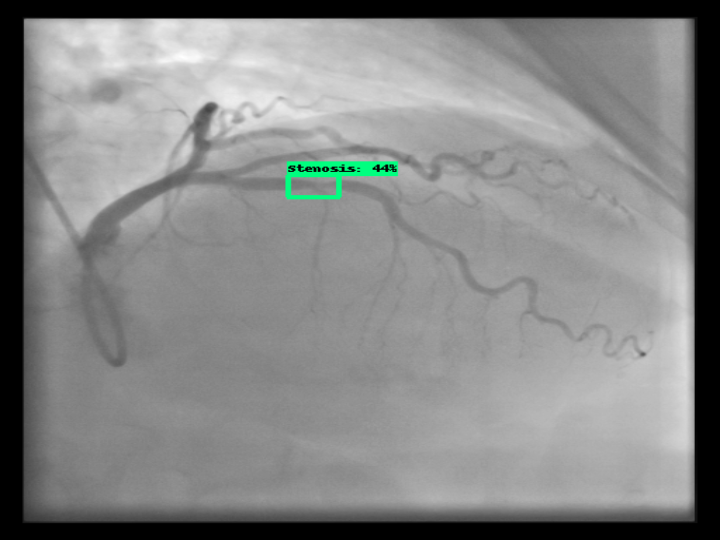

In [34]:
# PROVIDE PATH TO IMAGE DIRECTORY
#IMAGE_PATHS = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/train/14_002_5_0020.bmp'
IMAGE_PATHS = '/content/drive/MyDrive/workspace/stenosis_detection_FRCNN/images/test/14_002_5_0040.bmp'

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=1,
      min_score_thresh=0.3,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
imS = cv2.resize(image_with_detections, (720, 540)) 
cv2_imshow(imS)
# CLOSES WINDOW ONCE KEY IS PRESSED